In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 🧠 Early Stopping in Deep Learning

---

## 🚀 What is Early Stopping?

**Early Stopping** is a regularization technique used during training to avoid overfitting.  
It monitors the performance of the model on a **validation set** and stops training once the performance starts to degrade.

---

## 🎯 Why Use Early Stopping?

- Training too few epochs → ❌ Underfitting
- Training too many epochs → ❌ Overfitting
- ✅ Early stopping helps stop training **at the right time** for best generalization.

---

## 🔄 How Does It Work? (Step-by-Step)

1. **Split your data** into training and validation sets.
2. **Train the model**, and after each epoch:
   - Monitor a chosen metric (like `val_loss` or `val_accuracy`).
3. **Compare current metric with previous best**.
4. If the metric doesn't improve for a number of epochs (called `patience`), stop training early.
5. Optionally, restore the best weights using `restore_best_weights=True`.

---

## 📊 Example: When Early Stopping is Helpful

| Epoch | Train Loss ↓ | Val Loss ↓ |
|-------|--------------|------------|
| 1     | 0.75         | 0.82       |
| 2     | 0.62         | 0.74       |
| 3     | 0.54         | 0.68 ✅     |
| 4     | 0.48         | 0.72 ❌     |
| 5     | 0.41         | 0.76 ❌     |
| 6     | 0.38         | 0.81 ❌     |

With `patience = 2`, training will **stop at epoch 6**, and weights from **epoch 3** will be restored.

---

## 📌 Important Parameters

| Parameter              | Description                                      |
|------------------------|--------------------------------------------------|
| `monitor`              | Metric to track (e.g., `'val_loss'`)            |
| `patience`             | How many epochs to wait for improvement         |
| `restore_best_weights` | Whether to restore the best model weights       |

---

## ✅ Benefits

- Prevents **overfitting**
- Saves **computation time**
- Improves **model generalization**

---



In [2]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras  import Sequential 
from tensorflow.keras.layers import Dense
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles 
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

2025-07-20 18:43:20.085927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753037000.447177      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753037000.546333      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
X,y=make_circles(n_samples=100,noise=0.1,random_state=32)

<Axes: >

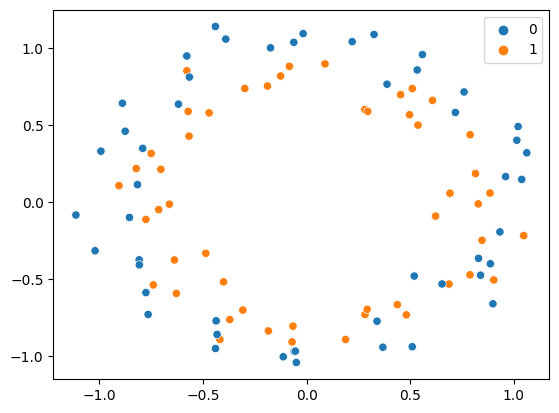

In [4]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
model=Sequential()


In [7]:
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1753037021.334758      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1753037021.335567      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
early_stop = EarlyStopping(monitor='accuracy', min_delta=0.00001,mode="auto",patience=5, restore_best_weights=True)

In [10]:
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=3110,verbose=1,callbacks=[early_stop])

Epoch 1/3110


I0000 00:00:1753037024.492377      61 service.cc:148] XLA service 0x78b2dc005400 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753037024.493796      61 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1753037024.493820      61 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1753037024.764897      61 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.5000 - loss: 0.6934

I0000 00:00:1753037025.415944      61 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 511ms/step - accuracy: 0.5266 - loss: 0.6930 - val_accuracy: 0.3500 - val_loss: 0.6960
Epoch 2/3110
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5437 - loss: 0.6906 - val_accuracy: 0.3500 - val_loss: 0.6978
Epoch 3/3110
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5594 - loss: 0.6883 - val_accuracy: 0.3500 - val_loss: 0.6996
Epoch 4/3110
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5469 - loss: 0.6890 - val_accuracy: 0.4000 - val_loss: 0.7022
Epoch 5/3110
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5625 - loss: 0.6865 - val_accuracy: 0.4000 - val_loss: 0.7044
Epoch 6/3110
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5664 - loss: 0.6858 - val_accuracy: 0.3500 - val_loss: 0.7056
Epoch 7/3110
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5586 - loss: 0.6829 - val_accuracy: 0.4000 - val_loss: 0.7067
Epoch 8/3110
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6000 - loss: 0.6834 - val_accuracy: 0.4000 - val_loss: 0.7

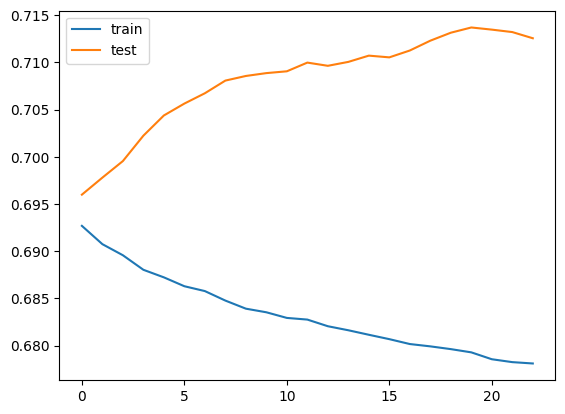

In [11]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()

In [12]:
early_stop2 = EarlyStopping(monitor='accuracy', min_delta=0.00001,mode="auto",patience=5, restore_best_weights=True)

In [13]:
history2=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=3110,verbose=1,callbacks=[early_stop2])

Epoch 1/3110
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6187 - loss: 0.6819 - val_accuracy: 0.4000 - val_loss: 0.7119
Epoch 2/3110
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5984 - loss: 0.6764 - val_accuracy: 0.4000 - val_loss: 0.7118
Epoch 3/3110
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5906 - loss: 0.6808 - val_accuracy: 0.4000 - val_loss: 0.7115
Epoch 4/3110
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6141 - loss: 0.6748 - val_accuracy: 0.4000 - val_loss: 0.7122
Epoch 5/3110
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5648 - loss: 0.6792 - val_accuracy: 0.4000 - val_loss: 0.7118
Epoch 6/3110
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5531 - loss: 0.6780 - val_accuracy: 0.4000 - val_loss: 0.7120


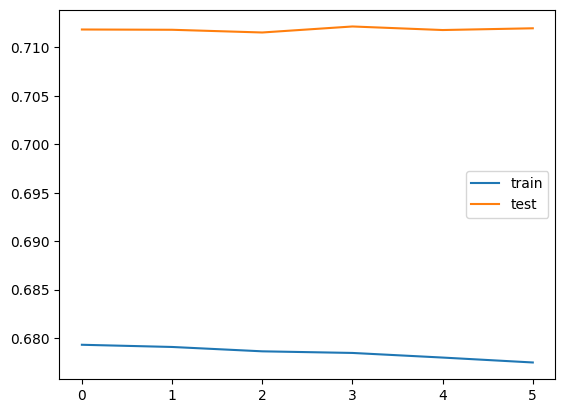

In [14]:
plt.plot(history2.history['loss'],label='train')
plt.plot(history2.history['val_loss'],label='test')
plt.legend()